# Backtest Strategy
Calculate total return of a strategy vs no strategy

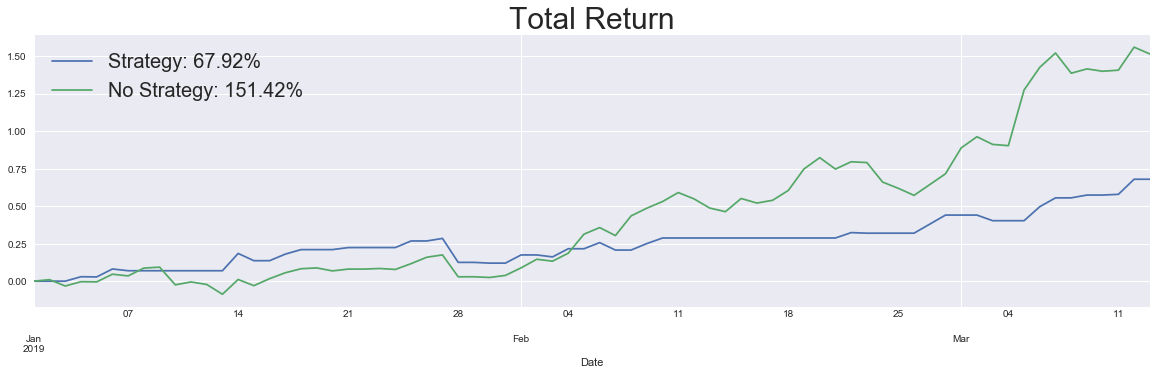

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from random import randint

_figsize = (20,5)

def load_data(filename):
    return pd.read_excel(filename, parse_dates=['Date'], index_col='Date')
    
def get_pct_change(df, col):
    df['Pct Change'] = df[col].pct_change()
    return df
 
def get_total_return(df, signal):
    total_return = [1] * df.shape[0]
    for i in list(range(1, df.shape[0])):
        total_return[i] = total_return[i-1] * (1+(df.iloc[i,5]) * signal[i])
    return [val -1 for val in total_return]

def get_random_signal(n):
    return [randint(0,1) for i in list(range(n))]
    
# Load data    
bnb = load_data('./data/BNBUSDT.xlsx')
bnb = get_pct_change(bnb, 'Close')

# Compute total return with no strategy
signal = [1]*bnb.shape[0]
bnb['No Strategy'] = get_total_return(bnb, signal)

# Compute total return with strategy
signal = get_random_signal(bnb.shape[0])
bnb['Strategy'] = get_total_return(bnb, signal)

# Plot results
bnb[['Strategy', 'No Strategy']].plot(figsize=_figsize)
plt.title('Total Return', fontsize=30)

legend = ['Strategy: ' +str(round((bnb['Strategy'].tail(1)[0])*100,2))+'%', 
          'No Strategy: ' +str(round((bnb['No Strategy'].tail(1)[0])*100,2))+'%']
plt.legend(legend, fontsize=20)


plt.show()